# The Python ecosystem - The SciPy library

The [SciPy library](https://www.scipy.org/scipylib/index.html) is one of the core packages that make up the [SciPy stack](https://www.scipy.org/) (a Python-based ecosystem of open-source software for mathematics, science, and engineering). It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab.

SciPy is organized into subpackages covering different scientific computing domains. These are summarized in the following table:

Subpackage | Description
--- | ---
cluster | Clustering algorithms
constants | Physical and mathematical constants
fftpack | Fast Fourier Transform routines
integrate | Integration and ordinary differential equation solvers
interpolate | Interpolation and smoothing splines
io | Input and Output
linalg | Linear algebra
ndimage | N-dimensional image processing
odr | Orthogonal distance regression
optimize | Optimization and root-finding routines
signal | Signal processing
sparse | Sparse matrices and associated routines
spatial | Spatial data structures and algorithms
special | Special functions
stats | Statistical distributions and functions

## Physical and mathematical constants (`scipy.constants`)

[Constants at SciPy's online documentation](https://docs.scipy.org/doc/scipy/reference/constants.html)

In [1]:
import scipy.constants as c 

In [2]:
c.astronomical_unit

149597870691.0

In [3]:
# speed_of_sound, one Mach (approx., at 15 C, 1 atm) in meters per second
c.speed_of_sound

340.5

In [4]:
# speed of light in vacuum (m/s)
c.speed_of_light

299792458.0

In [5]:
# one light year in meters
c.light_year

9460730472580800.0

In [6]:
# one mile in meters
c.mile

1609.3439999999998

In [7]:
# one nautical mile in meters
c.nautical_mile

1852.0

In [8]:
# one knot in meters per second
c.knot

0.5144444444444445

## 1d-Interpolation (`scipy.interpolate`)

[Interpolation at SciPy's online documentation](https://docs.scipy.org/doc/scipy/reference/interpolate.html)

In [9]:
# Import libraries
import matplotlib.pyplot as plt  
import numpy as np 

In [10]:
# Generate data
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

In [11]:
print("x: ", x)
print("y: ", y)

x:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
y:  [ 1.          0.99383351  0.90284967  0.54030231 -0.20550672 -0.93454613
 -0.65364362  0.6683999   0.67640492 -0.91113026  0.11527995]


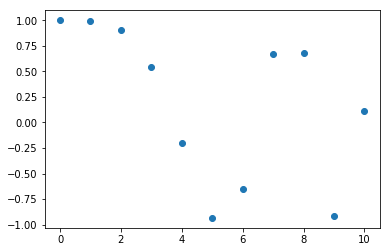

In [12]:
plt.plot(x, y, 'o');

Using the [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) function for interpolation. 

In [13]:
from scipy.interpolate import interp1d 

# defaut uses linear interpolation
f1 = interp1d(x, y)
# specifieing a cubic interpolation
f2 = interp1d(x, y, kind='cubic')

In [14]:
# gereate new data
xnew = np.linspace(start=0, stop=10, num=200)

In [15]:
# apply interpolation algorithm
inter1 =  f1(xnew)
inter2 =  f2(xnew)

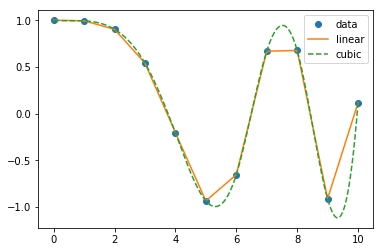

In [16]:
# plot results
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(xnew, inter1, '-')
ax.plot(xnew, inter2 , '--')
ax.legend(['data', 'linear', 'cubic'], loc='best');

## Curve fitting (`scipy.optimize.curve_fit`)

[Curve fitting at SciPy's online documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

### Apply a non-linear solver to fit an exponential function 


Source: [stackoverflow](https://stackoverflow.com/questions/3938042/fitting-exponential-decay-with-no-initial-guessing)

$$y(x)=y_{0} \times e^{mx}+ C$$




**Load sample data**

In [17]:
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src'))
sys.path.append(src_dir)
print(src_dir)

C:\Users\josi\Documents\workshop-data-science\src


In [18]:
import helper_funcs as hf

In [19]:
data_x, data_y = hf.data_exponential()

Plotting the data

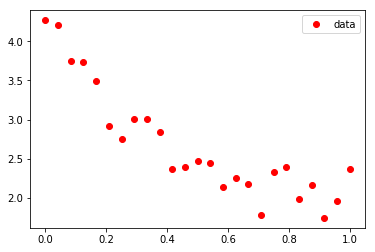

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(data_x, data_y, 'ro', label="data")
ax.legend();

**Define the model function**

$$y(x)=y_{0} \times e^{mx}+ C$$

In [21]:
import numpy as np
def model_func(x, y0, m, C):
    return y0 * np.exp(m * x) + C

**Define fitting function using `sp.optimize.curve_fit`**

In [22]:
from scipy.optimize import curve_fit
def fit_exp_nonlinear(x, y):
    opt_parms, parm_cov = curve_fit(model_func, x, y, maxfev=2000)
    y0, m, C = opt_parms
    return y0, m, C 

In [23]:
y0, m, C = fit_exp_nonlinear(data_x, data_y)
print("y0:", y0)
print("m:", m)
print("C:", C)

y0: 2.4586949830039737
m: -3.275257376908284
C: 1.932308274218778


Generate data points to be computed  

In [24]:
x_new = np.linspace(0,1,200)

Fit generated data with paramters

In [25]:
fit_y = model_func(x_new, y0, m, C)

Plot data and fitted curve

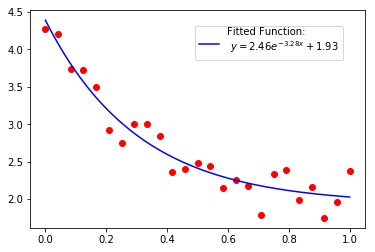

In [26]:
fig, ax = plt.subplots()
ax.plot(data_x, data_y, 'ro')
ax.plot(x_new, fit_y, 'b-',
        label='Fitted Function:\n $y = %0.2f  e^{%0.2f x} + %0.2f$' % (y0, m, C))

ax.legend(bbox_to_anchor=(0.95, 0.95));